In [1]:
import json
import string
import random
import pathlib
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
with open('/content/Mental Health Conversational.json', 'r') as content:
  chatbot = json.load(content)
data = pd.DataFrame(chatbot['intents'])

In [4]:
dictionary = {"tag":[], "patterns":[], "responses":[]}
for i in range (len(data)):
  pattern = data[data.index==i]['patterns'].values[0]
  response = data[data.index==i]['responses'].values[0]
  tag = data[data.index==i]['tag'].values[0]
  for j in range (len(pattern)):
    dictionary['tag'].append(tag)
    dictionary['patterns'].append(pattern[j])
    dictionary['responses'].append(response)
data = pd.DataFrame.from_dict(dictionary)
data

,tag,patterns,responses
0,greeting,Hai,[Halo! Selamat bertemu denganmu. Bagaimana kab...
1,greeting,Halo,[Halo! Selamat bertemu denganmu. Bagaimana kab...
2,greeting,Hai apa kabar?,[Halo! Selamat bertemu denganmu. Bagaimana kab...
3,greeting,Hi,[Halo! Selamat bertemu denganmu. Bagaimana kab...
4,greeting,Assalamualaikum,[Halo! Selamat bertemu denganmu. Bagaimana kab...
...,...,...,...
200,fact_28,Bagaimana saya bisa menjaga hubungan sosial? B...,"[Banyak orang yang sendirian saat ini, tapi ki..."
201,fact_29,Apa perbedaan antara kecemasan dan stress?,[Stres dan kecemasan sering digunakan secara b...
202,fact_29,perbedaan kecemasan dan stress,[Stres dan kecemasan sering digunakan secara b...
203,fact_30,Apa perbedaan antara kesedihan dan depresi?,[Kesedihan merupakan reaksi normal terhadap ke...


In [ ]:
with open('/content/Validation_Conversation.json', 'r') as content:
  val_chatbot = json.load(content)
val_data = pd.DataFrame(val_chatbot['intents'])


In [6]:
dictionary = {"tag":[], "patterns":[]}
for i in range (len(val_data)):
  pattern = val_data[val_data.index==i]['patterns'].values[0]
  tag = val_data[val_data.index==i]['tag'].values[0]
  for j in range (len(pattern)):
    dictionary['tag'].append(tag)
    dictionary['patterns'].append(pattern[j])
val_data = pd.DataFrame.from_dict(dictionary)
val_data

,tag,patterns
0,greeting,Halo
1,greeting,Hai apa kabar?
2,greeting,Hi
3,morning,pagi
4,afternoon,siang
...,...,...
101,fact_26,Apa yang harus saya lakukan jika saya khawatir...
102,fact_27,Bagaimana saya tahu kalau saya tidak sehat?
103,fact_28,Bagaimana saya bisa menjaga hubungan sosial? B...
104,fact_29,perbedaan kecemasan dan stress


In [7]:
# Training
data['tag'].unique()

array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
       'thanks', 'about', 'skill', 'creation', 'help', 'sad', 'stressed',
       'worthless', 'depressed', 'happy', 'casual', 'anxious',
       'not-talking', 'sleep', 'scared', 'death', 'understand', 'done',
       'suicide', 'hate-you', 'hate-me', 'default', 'jokes', 'repeat',
       'wrong', 'stupid', 'location', 'something-else', 'ask', 'problem',
       'no-approach', 'learn-more', 'user-agree', 'meditation',
       'user_meditation', 'hugu_useful', 'user-advice',
       'learn_mental_health', 'mental_health_fact', 'fact_1', 'fact_2',
       'fact_3', 'fact_4', 'fact_5', 'fact_6', 'fact_7', 'fact_8',
       'fact_9', 'fact_10', 'fact_11', 'fact_12', 'fact_13', 'fact_14',
       'fact_15', 'fact_16', 'fact_17', 'fact_18', 'fact_19', 'fact_20',
       'fact_21', 'fact_22', 'fact_23', 'fact_24', 'fact_25', 'fact_26',
       'fact_27', 'fact_28', 'fact_29', 'fact_30'], dtype=object)

In [8]:
# Validation
val_data['tag'].unique()

array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
       'thanks', 'about', 'skill', 'creation', 'help', 'sad', 'stressed',
       'worthless', 'depressed', 'happy', 'casual', 'anxious',
       'not-talking', 'sleep', 'scared', 'death', 'understand', 'done',
       'suicide', 'hate-you', 'hate-me', 'default', 'jokes', 'repeat',
       'wrong', 'stupid', 'location', 'something-else', 'ask', 'problem',
       'no-approach', 'learn-more', 'user-agree', 'meditation',
       'user_meditation', 'hugu_useful', 'user-advice',
       'learn_mental_health', 'mental_health_fact', 'fact_1', 'fact_2',
       'fact_3', 'fact_4', 'fact_5', 'fact_6', 'fact_7', 'fact_8',
       'fact_9', 'fact_10', 'fact_11', 'fact_12', 'fact_13', 'fact_14',
       'fact_15', 'fact_16', 'fact_17', 'fact_18', 'fact_19', 'fact_20',
       'fact_21', 'fact_22', 'fact_23', 'fact_24', 'fact_25', 'fact_26',
       'fact_27', 'fact_28', 'fact_29', 'fact_30'], dtype=object)

In [10]:
with open('/content/word_dict.json', 'r') as f:
  json_dict = json.load(f)
tokenizer_json=json_dict.keys()

tokenizer = Tokenizer(lower=True, split=' ', oov_token='<OOV>')
tokenizer.fit_on_texts(tokenizer_json)

word_index = tokenizer.word_index
print(len(word_index))

18727


In [9]:
data = shuffle(data)
val_data = shuffle(val_data)

In [11]:
label_encode = LabelEncoder()

tokenizer.fit_on_texts(data['patterns'])
tokenizer.fit_on_texts(val_data['patterns'])

# Training Set
pattern_train = tokenizer.texts_to_sequences(data['patterns'])
x_train = pad_sequences(pattern_train, padding='post', maxlen=12, truncating='pre')
print("Training Input Shape : ", x_train.shape)
print(len(x_train[0]))

x_label = label_encode.fit_transform(data['tag'])
print("Training Label Shape : ", x_label.shape)
print("Num of classes: ", len(np.unique(x_label)))

Training Input Shape :  (205, 12)
12
Training Label Shape :  (205,)
Num of classes:  75


In [12]:
# Validation Set
pattern_val = tokenizer.texts_to_sequences(val_data['patterns'])
y_train = pad_sequences(pattern_val, padding='post', maxlen=12, truncating='pre')
print("Validation Input Shape : ", y_train.shape)
print(len(y_train[0]))

y_label = label_encode.fit_transform(val_data['tag'])
print("Validation Label Shape : ",y_label.shape)
print("Num of classes: ", len(np.unique(y_label)))

Validation Input Shape :  (106, 12)
12
Validation Label Shape :  (106,)
Num of classes:  75


In [16]:
vocabulary = len(tokenizer.word_index)
print("Number unique word : ",vocabulary)
print("Output Length : ", label_encode.classes_.shape[0])

# print("Output length : ", len(np.unique(x_label)))

Number unique word :  18757
Output Length :  75


In [17]:
# !rm -f glove.6B.zip
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2023-12-15 06:46:04--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-12-15 06:46:05--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.02MB/s    in 2m 39s  

2023-12-15 06:48:44 (5.18 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflatin

In [18]:
glove_dir = "/content/glove.6B.100d.txt"
embeddings_index = {}
file_ = open(glove_dir, encoding='utf8')
for line in file_:
  arr = line.split()
  single_word = arr[0]
  w = np.asarray(arr[1:],dtype='float32')
  embeddings_index[single_word] = w
file_.close()
print(len(embeddings_index))

400000


In [19]:
max = vocabulary + 1
word_index =tokenizer.word_index
embedding_mat = np.zeros((max, 100)).astype(object)
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_mat[i] = embedding_vector

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_length=x_train.shape[1], input_dim=vocabulary+1, output_dim = 100, mask_zero=True,
                              weights=[embedding_mat], trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=False)),
    tf.keras.layers.LayerNormalization(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(np.unique(x_label)), activation='softmax')
])

model.summary()
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 12, 100)           1875800   
                                                                 
 bidirectional_3 (Bidirecti  (None, 12, 128)           63744     
 onal)                                                           
                                                                 
 layer_normalization_4 (Lay  (None, 12, 128)           256       
 erNormalization)                                                
                                                                 
 bidirectional_4 (Bidirecti  (None, 12, 128)           74496     
 onal)                                                           
                                                                 
 layer_normalization_5 (Lay  (None, 12, 128)           256       
 erNormalization)                                     

In [22]:
history = model.fit(x_train, x_label, validation_data=(y_train, y_label),
                    batch_size=10, epochs=500,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)])

Epoch 1/500
21/21 [==============================] - 39s 524ms/step - loss: 4.4383 - accuracy: 0.0390 - val_loss: 3.6838 - val_accuracy: 0.1887
Epoch 2/500
21/21 [==============================] - 1s 54ms/step - loss: 3.4021 - accuracy: 0.2293 - val_loss: 2.8563 - val_accuracy: 0.3679
Epoch 3/500
21/21 [==============================] - 1s 55ms/step - loss: 2.6079 - accuracy: 0.4195 - val_loss: 2.1909 - val_accuracy: 0.5094
Epoch 4/500
21/21 [==============================] - 1s 61ms/step - loss: 1.9641 - accuracy: 0.5317 - val_loss: 1.6293 - val_accuracy: 0.6981
Epoch 5/500
21/21 [==============================] - 1s 71ms/step - loss: 1.5246 - accuracy: 0.6537 - val_loss: 1.2191 - val_accuracy: 0.7547
Epoch 6/500
21/21 [==============================] - 2s 98ms/step - loss: 1.2177 - accuracy: 0.6829 - val_loss: 0.9979 - val_accuracy: 0.7925
Epoch 7/500
21/21 [==============================] - 2s 83ms/step - loss: 0.9573 - accuracy: 0.7659 - val_loss: 0.8352 - val_accuracy: 0.8208
Epoc

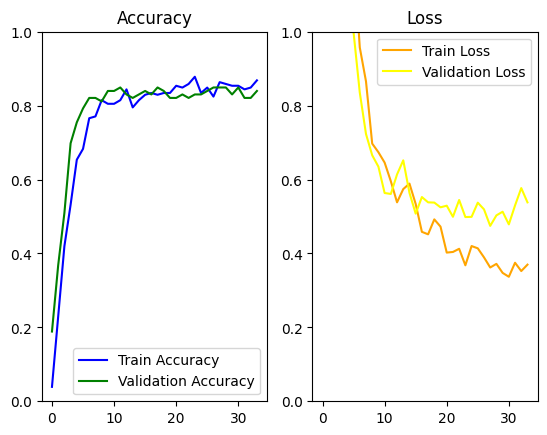

In [23]:
def plot_training_history(history):
    # Plotting training accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
    plt.legend(loc='lower right')
    plt.title('Accuracy')
    plt.ylim(0, 1.0)

    # Plotting training loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', color='orange')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='yellow')
    plt.legend(loc='upper right')
    plt.title('Loss')
    plt.ylim(0, 1.0)

    # Display the plots
    plt.show()
plot_training_history(history)

In [30]:
def chatbot_test():
  while True:
    user_input = input("User: ").lower()

    pattern_test = tokenizer.texts_to_sequences([user_input])
    x_test = pad_sequences(pattern_test, x_train.shape[1])

    prediction = model.predict(x_test)[0]
    label = label_encode.inverse_transform([np.argmax(prediction)])[0]
    response = data[data['tag'] == label]['responses'].values[0]
    print("Label:",label)
    print("Chatbot: ", format(random.choice(response)))
    if label=='goodbye' or label=='thanks':
      break
chatbot_test()

User: halo
1/1 [==============================] - 0s 28ms/step
greeting
Chatbot:  Senang bertemu denganmu. Bagaimana perasaanmu saat ini?
User: Apa itu depresi
1/1 [==============================] - 0s 31ms/step
fact_5
Chatbot:  Psikolog adalah sebutan bagi seseorang yang mendalami ilmu psikologi.
User: perbedaan depresi dan kesedihan
1/1 [==============================] - 0s 32ms/step
fact_30
Chatbot:  Kesedihan merupakan reaksi normal terhadap kehilangan, kekecewaan, masalah, atau situasi sulit lainnya. Merasa sedih dari waktu ke waktu hanyalah bagian lain dari menjadi manusia. Dalam kasus ini, perasaan sedih akan hilang dengan cepat dan Anda dapat menjalani kehidupan sehari-hari. Cara lain untuk mengungkapkan kesedihan adalah dengan merasa sedih, sedih, atau sedih. Seseorang mungkin mengatakan bahwa mereka merasa tertekan, tetapi jika perasaan itu hilang dengan sendirinya dan tidak berdampak besar pada kehidupan, mungkin hal itu tidak terjadi. t penyakit depresi. Depresi adalah peny

In [31]:
tf.saved_model.save(model,'/content/TFLite/')


In [32]:
saved_model_path = '/content/TFLite/'


loaded_model = tf.saved_model.load(saved_model_path)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = False

tflite_model = converter.convert()

tflite_model_file = pathlib.Path('chatbot_model.tflite')
tflite_model_file.write_bytes(tflite_model)

8612016

In [33]:
from google.colab import files
files.download('chatbot_model.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>